# Verification the angular spectrum propagation function
We can can verify that the angular spectrum propagator works by using Gaussian beam theory to calculate the width of a Gaussian beam at two separate planes and compare it to SimMLA's numerical results.

**Note: This notebook contains LaTeX that may not be visible when viewed from GitHub. Try downloading it and opening it with the Jupyter Notebook application.**

In [1]:
%pylab
%matplotlib inline
import SimMLA.fftpack as simfft
import SimMLA.grids   as grids
import SimMLA.fields  as fields

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define a Gaussian beam
Z0         = 376.73 # Impedance of free space, Ohms
power      = 100    # mW
beamStd    = 1000   # microns
wavelength = 0.642  # microns

fieldAmp = np.sqrt(power / 1000 * Z0 / beamStd / np.sqrt(np.pi)) # Factor of 1000 converts from mW to W
beam     = fields.GaussianBeamWaistProfile(fieldAmp, beamStd)

The width of a Gaussian beam as a function of its propagation distance along the z-direction is given by

$$ w \left( z \right) = w_{0} \sqrt{1 + \left( \frac{z}{z_R} \right)^2 } $$

with \\( z_R = \frac{\pi w_0^2}{\lambda} \\) and \\( w_0 \\) the beam size at the waist.

The beam waist is related to the standard deviation by \\( w_0^2 = 2 \sigma^2 \\).

At a distance of \\( z = 10 \, m = 1 \times 10^7 \, \mu m \\), the theoretical size is

$$ w \left( z = 10^7 \, \mu m \right) = \sqrt{2 \left (10^3 \, \mu m \right)^2} \sqrt{1 + \left( \frac{10^7 \, \mu m \times 0.642 \, \mu m}{\pi \times 2 \left( 10^3 \, \mu m \right)^2} \right)^2} = 2021 \, \mu m$$

with a standard deviation of \\( \frac{2021 \, \mu m}{\sqrt{2}} \\approx 1430 \, \mu m \\).

In [3]:
w = np.sqrt(2 * 1e3**2) * np.sqrt(1 + ((1e7 * 0.642)/(np.pi * 2 * (1e3)**2))**2)
print(w)
print(w / np.sqrt(2) )

2021.89198938
1429.69353652


In [4]:
gridSize     = 10001 # samples
physicalSize = 100000 # microns
propDistance = 1e7 # microns
grid = grids.Grid(gridSize, physicalSize, wavelength, 1, dim = 1) # focalLength doesn't matter

u2 = simfft.fftPropagate(beam(grid.px), grid, propDistance)

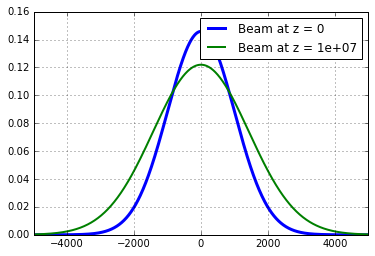

In [5]:
plt.plot(grid.px, beam(grid.px), linewidth = 3, label = 'Beam at z = 0')
plt.plot(grid.px, np.abs(u2), linewidth = 2, label = 'Beam at z = {0:0.0e}'.format(propDistance))
plt.xlim((-5000, 5000))
plt.grid(True)
plt.legend()
plt.show()

In [6]:
from scipy.optimize import curve_fit

In [7]:
def Gaussian(x, *p):
    amp, std = p
    
    return amp * exp(-x**2 / 2 / std**2)
pinit   = [0.015, 3000]
popt, _ = curve_fit(Gaussian, grid.px, np.abs(u2), p0 = pinit)

In [8]:
print('The theoretical beam standard deviation is: {:.2f}'.format(w / np.sqrt(2)))
print('The numerical beam standard deviation is: {0:.2f}'.format(popt[1]))

The theoretical beam standard deviation is: 1429.69
The numerical beam standard deviation is: 1429.84


The check passes, which demonstrates that the angular spectrum propagation is working as expected.